Accuracy: 100.0 %


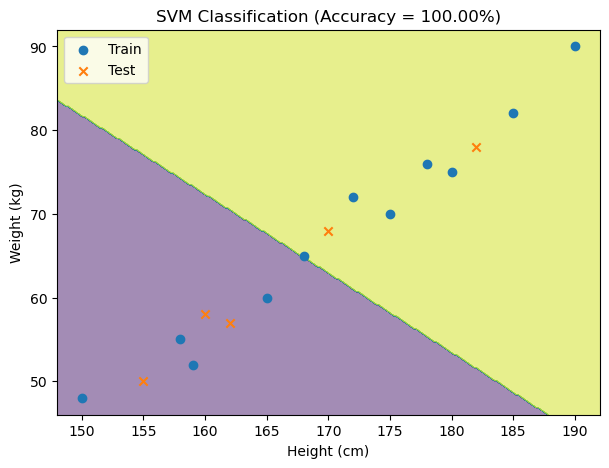


Confusion Matrix (Raw Numbers):
[[3 0]
 [0 2]]


<Figure size 500x400 with 0 Axes>

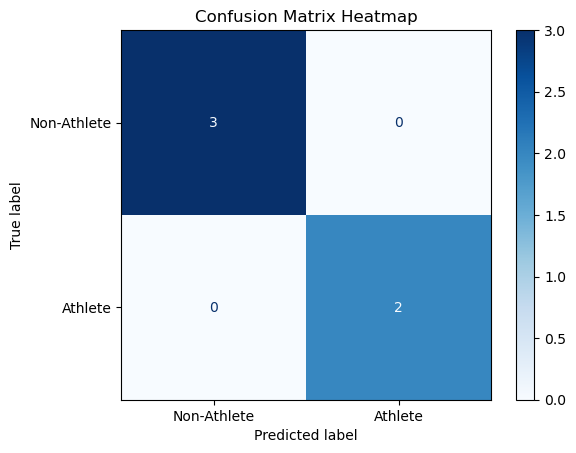

In [7]:
#Implement SVM on dataset of peoples and on the basis of weight or height we classify them as athlete or not
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
data = [
    [180, 75, 1], [175, 70, 1], [182, 78, 1], [170, 68, 1],
    [168, 65, 0], [158, 55, 0], [160, 58, 0], [155, 50, 0],
    [185, 82, 1], [150, 48, 0], [178, 76, 1], [165, 60, 0],
    [172, 72, 1], [162, 57, 0], [190, 90, 1], [159, 52, 0]
]

data = np.array(data)
X = data[:, :2]
y = data[:, 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

# SVM Model (Rbf Kernel)
model = SVC(kernel="rbf")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = (y_pred == y_test).mean() * 100
print("Accuracy:", round(acc, 2), "%")

#Decision Boundary Visualization 
plt.figure(figsize=(7,5))

# Create meshgrid
x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict on mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Decision boundary background
plt.contourf(xx, yy, Z, alpha=0.5)

# Plot training & testing points
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', label="Test")

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title(f"SVM Classification (Accuracy = {acc:.2f}%)")
plt.legend()
plt.show()

#Confusion Matrix (Raw + Visualization)
cm = confusion_matrix(y_test, y_pred)

#Print numerical matrix
print("\nConfusion Matrix (Raw Numbers):")
print(cm)

#Visualize as heatmap
plt.figure(figsize=(5,4))
disp = ConfusionMatrixDisplay(cm, display_labels=["Non-Athlete","Athlete"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix Heatmap")
plt.show()
